![example](images/director_shot.jpeg)

# EDA of the IMDB Movies Database

**Authors:** Melody Bass
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [69]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [70]:
# Here you run your code to explore the data

df = pd.read_csv('data/zippeddata/datasets/all_df.csv')

df.head()

/Users/melodybass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
4,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,22,madame dubarry


In [71]:
df.shape

(74889, 24)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  object 
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

In [73]:
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     59
language                   718
director                    66
writer                    1305
production_company        3744
actors                      52
description                  0
avg_vote                     0
votes                        0
budget                   54078
usa_gross_income         61331
worlwide_gross_income    47971
metascore                63211
reviews_from_users        6047
reviews_from_critics      9708
description_#words           0
movie_title                  0
dtype: int64

In [74]:
df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,description_#words
count,74889.000000,74889.000000,7.488900e+04,11678.000000,68842.000000,65181.000000,74889.000000
mean,100.352522,5.900541,9.730489e+03,55.712023,46.574853,27.658566,29.717956
std,22.357984,1.229920,5.473764e+04,17.763344,180.482569,58.829668,7.226405
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,16.000000
25%,88.000000,5.200000,2.100000e+02,43.000000,4.000000,3.000000,24.000000
50%,96.000000,6.100000,5.000000e+02,56.000000,9.000000,8.000000,31.000000
75%,108.000000,6.800000,1.789000e+03,69.000000,27.000000,24.000000,35.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,79.000000


In [75]:
sum(df.duplicated())

0

In [76]:
df.nunique()

imdb_title_id            74889
title                    71907
original_title           70906
year                       151
date_published           20790
genre                     1213
duration                   258
country                   4483
language                  3994
director                 31925
writer                   59381
production_company       29309
actors                   74806
description              74821
avg_vote                    89
votes                    13733
budget                    4217
usa_gross_income         13171
worlwide_gross_income    26446
metascore                   99
reviews_from_users        1169
reviews_from_critics       578
description_#words          63
movie_title              70868
dtype: int64

## Data Preparation and Cleaning

In this section, I will clean the dataset by removing unused columns and trim the dataset of null values and irrelevant data to the questions that I want to answer.  I will then extract data and create new columns to prepare for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Remove data from outside USA

In [77]:
# Drop rows where movie was not made in USA, to avoid currency conversion issues
df = df[df.country == 'USA']

In [78]:
# Drop rows that do not have budget values in US$

drop_names = df[(df['budget'] == 'CAD 6500000') | (df['budget'] == 'AUD 1000') | 
             (df['budget'] == 'EUR 2000')].index

df.drop(drop_names, inplace=True)    
    
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
10,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,5.8,187,NaN,NaN,NaN,NaN,6.0,NaN,26,"home, sweet home"
12,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,6.0,552,$ 5700,NaN,NaN,NaN,14.0,11.0,28,traffic in souls
14,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,1914-08-24,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,...,6.4,1105,NaN,NaN,NaN,NaN,14.0,11.0,16,the avenging conscience: or 'thou shalt not kill'


### Drop unused columns

In [79]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'description_#words',
       'movie_title'],
      dtype='object')

In [80]:
#Drop columns that will not be used
df.drop(['imdb_title_id', 'original_title', 'year', 'language', 'country', 'production_company', 
         'description', 'description_#words', 'movie_title', 'metascore', 'usa_gross_income'],
        axis=1, inplace=True)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
1,Cleopatra,1912-11-13,"Drama, History",100,Charles L. Gaskill,Victorien Sardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,$ 45000,NaN,25.0,3.0
3,"From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,Sidney Olcott,Gene Gauntier,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,484,NaN,NaN,13.0,5.0
10,Amore di madre,1914-05-17,Drama,55,D.W. Griffith,"D.W. Griffith, H.E. Aitken","Henry B. Walthall, Josephine Crowell, Lillian ...",5.8,187,NaN,NaN,6.0,NaN
12,Traffic in Souls,1913-11-24,"Crime, Drama",88,George Loane Tucker,NaN,"Jane Gail, Ethel Grandin, William H. Turner, M...",6.0,552,$ 5700,NaN,14.0,11.0
14,The Avenging Conscience: or 'Thou Shalt Not Kill',1914-08-24,"Crime, Drama, Horror",78,D.W. Griffith,"Edgar Allan Poe, D.W. Griffith","Henry B. Walthall, Spottiswoode Aitken, Blanch...",6.4,1105,NaN,NaN,14.0,11.0


### Drop rows with null values

There are 25,232 movies in the dataset, but several null values.  I will drop records that do not have values.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25232 entries, 1 to 74875
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  25232 non-null  object 
 1   date_published         25232 non-null  object 
 2   genre                  25232 non-null  object 
 3   duration               25232 non-null  int64  
 4   director               25207 non-null  object 
 5   writer                 25065 non-null  object 
 6   actors                 25210 non-null  object 
 7   avg_vote               25232 non-null  float64
 8   votes                  25232 non-null  int64  
 9   budget                 9313 non-null   object 
 10  worlwide_gross_income  6821 non-null   object 
 11  reviews_from_users     24979 non-null  float64
 12  reviews_from_critics   23589 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.7+ MB


In [82]:
# Drop all of our null values from dataset
df.dropna(inplace=True)

In [83]:
# Check to see if it worked
df.isnull().sum().any()

False

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 201 to 74780
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  4161 non-null   object 
 1   date_published         4161 non-null   object 
 2   genre                  4161 non-null   object 
 3   duration               4161 non-null   int64  
 4   director               4161 non-null   object 
 5   writer                 4161 non-null   object 
 6   actors                 4161 non-null   object 
 7   avg_vote               4161 non-null   float64
 8   votes                  4161 non-null   int64  
 9   budget                 4161 non-null   object 
 10  worlwide_gross_income  4161 non-null   object 
 11  reviews_from_users     4161 non-null   float64
 12  reviews_from_critics   4161 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 455.1+ KB


### Create columns for profit and ROI

In [85]:
# Converting currency to integers for analysis
df['budget'] = df['budget'].replace({'\$': ''}, regex=True).astype(int)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace({'\$': ''}, regex=True).astype(int)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0


In [86]:
# Add a column for profit
df['profit'] = (df['worlwide_gross_income'] - df['budget'])
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0,8383673
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0,-339767
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0,-78893
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0,-212159
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0,-1999254


In [87]:
# Add a column for ROI
df['roi'] = ((df['profit'] / df['budget']) * 100)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0,8383673,1047.959125
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0,-339767,-96.799715
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0,-78893,-39.446500
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0,-212159,-97.769124
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0,-1999254,-99.962700


In [88]:
#Sort df by most profit
df = df.sort_values(by='profit', ascending=False)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622


### Change release date to datetime format and extract the month into a new column

In [89]:
# Change the date_published to datetime

df.date_published = pd.to_datetime(df['date_published'])

# Extracting the month of release
df['release_month'] = df['date_published'].dt.month
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622,11


In [90]:
# Check to see if it worked
df['release_month'].value_counts()

4     419
9     412
3     404
10    400
8     388
11    343
1     324
6     315
5     311
2     305
12    282
7     258
Name: release_month, dtype: int64

### Split rows with multiple genre types into single rows for each genre

In [91]:
# split the genres  from combined value into single genre value 
df_split = df.assign(genre = df['genre'].str.split(',')).explode('genre')
df_split.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,Action,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
42868,Avatar,2010-01-15,Adventure,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
42868,Avatar,2010-01-15,Fantasy,162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,Action,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
58600,Star Wars - Il risveglio della Forza,2015-12-16,Adventure,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12


In [92]:
#Remove white space from genres
df_split['genre'] = df_split['genre'].str.strip()

In [93]:
# Confirming it worked
df_split['genre'].value_counts()

Drama        2143
Comedy       1852
Action        869
Crime         824
Romance       798
Thriller      669
Adventure     594
Horror        427
Mystery       333
Sci-Fi        280
Fantasy       277
Family        256
Animation     185
Biography     142
Music         135
Sport         125
History        70
War            62
Musical        59
Western        45
Film-Noir      15
Name: genre, dtype: int64

### Extract top director for each movie where there is more than 1 director

In [94]:
#Separate first director into a different column for analysis
df['director1'] = df['director'].str.split(',').str[0]
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,director1
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,James Cameron
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12,J.J. Abrams
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4,Anthony Russo
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6,Colin Trevorrow
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622,11,Chris Buck


### Confirm changes and save the cleaned dataset

In [95]:
# Final number of movies after cleaning
rows, col = df.shape
print('After cleaning, we now have only {} rows of movies and {} columns.'.format(rows, col))

After cleaning, we now have only 4161 rows of movies and 17 columns.


In [96]:
# Save the cleaned dataset
df.to_csv('imdb-movies-cleaned.csv', index=False)
df_split.to_csv('imdb-movies-cleaned-genre', index=False)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### What movie runtime is the highest rated by users?

Movie length with the highest user ratings is  152 minutes.


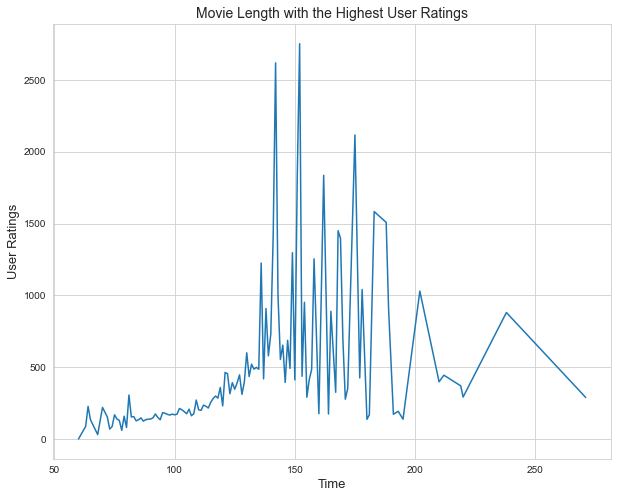

In [99]:
### Runtime film most liked by audience
run_time=df.groupby('duration')['reviews_from_users'].mean()
run_time.plot(figsize = (10,8))
#title            
plt.title("Movie Length with the Highest User Ratings",fontsize=14)            
plt.xlabel('Time',fontsize = 13)
plt.ylabel('User Ratings',fontsize = 13)
#max_value
max_run= run_time.idxmax()

print('Movie length with the highest user ratings is ', max_run, 'minutes.')

### What movie runtime is the highest rated by critics?

Movie length with the highest critic ratings is  168 minutes.


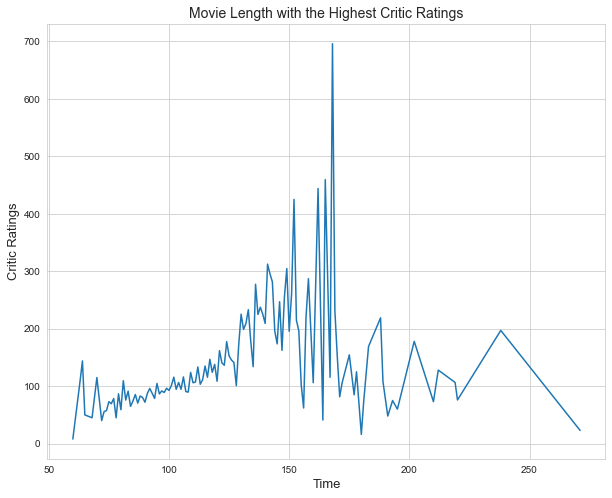

In [100]:
### Runtime film most liked by audience
run_time=df.groupby('duration')['reviews_from_critics'].mean()
run_time.plot(figsize = (10,8))
#title            
plt.title("Movie Length with the Highest Critic Ratings",fontsize=14)            
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Critic Ratings',fontsize = 13)
#max_value
max_run= run_time.idxmax()

print('Movie length with the highest critic ratings is ', max_run, 'minutes.')

### What directors (directed more than 5 movies) generate the most profit?

In [101]:
### Directors with the highest profit and ratings
director_df = df.groupby(by='director1', as_index=False)
director_df = director_df.mean()

In [102]:
director_df.head()

,director1,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
0,A.M. Lukas,88.0,5.8,939.0,800000.0,3861.0,20.0,19.0,-796139.0,-99.517375,9.0
1,Aaron Blaise,85.0,6.8,94355.0,128000000.0,250397798.0,180.0,113.0,122397798.0,95.623280,3.0
2,Aaron Fisher,90.0,4.5,153.0,1000000.0,8140.0,2.0,23.0,-991860.0,-99.186000,3.0
3,Aaron Harvey,96.0,5.0,9341.5,4500000.0,150714.5,69.0,32.0,-4349285.5,-97.673954,4.0
4,Aaron Horvath,84.0,6.8,15797.0,10000000.0,52090236.0,212.0,114.0,42090236.0,420.902360,9.0


In [103]:
# Dictionary of director and numbers of rows(# of movies)
name_counts = df['director1'].value_counts().to_dict()
name_counts

{'Woody Allen': 27,
 'Clint Eastwood': 21,
 'Steven Spielberg': 18,
 'Steven Soderbergh': 16,
 'Rob Reiner': 16,
 'Barry Levinson': 14,
 'Ron Howard': 14,
 'Francis Ford Coppola': 13,
 'Walter Hill': 13,
 'Martin Scorsese': 13,
 'Robert Zemeckis': 13,
 'John Carpenter': 12,
 'Ivan Reitman': 12,
 'Spike Lee': 12,
 'Garry Marshall': 12,
 'Wes Craven': 12,
 'Brian De Palma': 12,
 'Alfred Hitchcock': 11,
 'Kevin Smith': 11,
 'Sam Raimi': 11,
 'Tyler Perry': 11,
 'John Sayles': 11,
 'Robert Altman': 11,
 'John Landis': 11,
 'Sidney Lumet': 11,
 'Michael Bay': 10,
 'William Friedkin': 10,
 'Dennis Dugan': 10,
 'Mike Nichols': 10,
 'Michael Ritchie': 9,
 'Billy Wilder': 9,
 'Norman Jewison': 9,
 'Richard Donner': 9,
 'Bobby Farrelly': 9,
 'Joe Dante': 9,
 'David Gordon Green': 9,
 'Jon Turteltaub': 8,
 'Robert Redford': 8,
 'Andy Tennant': 8,
 'Gus Van Sant': 8,
 'John Badham': 8,
 'Mark Waters': 8,
 'Paul Mazursky': 8,
 'Andrew Davis': 8,
 'Antoine Fuqua': 8,
 'Richard Linklater': 8,
 'Tom S

In [104]:
# Director film count
director_df['film_count'] = director_df['director1'].map(name_counts)

In [105]:
director_df.head()

,director1,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,film_count
0,A.M. Lukas,88.0,5.8,939.0,800000.0,3861.0,20.0,19.0,-796139.0,-99.517375,9.0,1
1,Aaron Blaise,85.0,6.8,94355.0,128000000.0,250397798.0,180.0,113.0,122397798.0,95.623280,3.0,1
2,Aaron Fisher,90.0,4.5,153.0,1000000.0,8140.0,2.0,23.0,-991860.0,-99.186000,3.0,1
3,Aaron Harvey,96.0,5.0,9341.5,4500000.0,150714.5,69.0,32.0,-4349285.5,-97.673954,4.0,2
4,Aaron Horvath,84.0,6.8,15797.0,10000000.0,52090236.0,212.0,114.0,42090236.0,420.902360,9.0,1


In [106]:
# Sort by most profit
director_df.sort_values('profit', ascending=False, inplace=True)

In [107]:
# Make new column for director and number of movies they have directed
director_df['director+count'] = director_df['director1'].map(str) + "(" + director_df['film_count'].map(str) + ")"

In [108]:
# Check if it worked
director_df.head()

,director1,duration,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,film_count,director+count
819,J.A. Bayona,128.000000,6.200000,256534.000000,1.700000e+08,1.331958e+09,1853.000000,451.000000,1.161958e+09,683.504799,6.000000,1,J.A. Bayona(1)
1214,Kyle Balda,90.000000,6.350000,158289.000000,7.700000e+07,1.097121e+09,290.000000,301.500000,1.020121e+09,1330.157150,8.000000,2,Kyle Balda(2)
846,James Cameron,158.000000,7.533333,497918.666667,1.406667e+08,1.086441e+09,1426.666667,312.000000,9.457739e+08,445.144998,7.333333,3,James Cameron(3)
310,Chris Buck,97.666667,7.200000,293912.000000,1.433333e+08,1.059674e+09,907.333333,288.666667,9.163407e+08,621.772154,11.666667,3,Chris Buck(3)
1121,Josh Cooley,100.000000,7.800000,189129.000000,2.000000e+08,1.073395e+09,1287.000000,382.000000,8.733946e+08,436.697297,6.000000,1,Josh Cooley(1)


In [109]:
# Make dataframe that contains information about director and profit
dir_means = director_df[['director+count',  'film_count', 'profit']]

In [110]:
# Keep directors who have directed more than 5 movies 
dir_subset = director_df[director_df['film_count'] > 5]

In [111]:
#Top 10 directors based on profits
top10_dir_pro = dir_subset.sort_values(ascending = False, by = 'profit') \
                                    [['director+count','profit']].head(10)
top10_dir_pro.head()

,director+count,profit
704,George Lucas(6),5.144842e+08
1943,Steven Spielberg(18),3.572408e+08
732,Gore Verbinski(7),3.512048e+08
1381,Michael Bay(10),3.471802e+08
1782,Roland Emmerich(7),2.916285e+08


### What directors (directed more than 5 movies) have the highest user ratings?

In [112]:
# Top 10 directors based on user reviews
top10_dir_user_rat = dir_subset.sort_values(ascending = False, \
                                            by = 'reviews_from_users')[['director+count', \
                                            'reviews_from_users']].head(10)
top10_dir_user_rat.head()

,director+count,reviews_from_users
704,George Lucas(6),2244.166667
1642,Quentin Tarantino(6),1465.166667
732,Gore Verbinski(7),1191.428571
453,David Fincher(6),1034.666667
1381,Michael Bay(10),1017.400000


### What directors (directed more than 5 movies) have the highest critic reviews?

In [113]:
#Top 10 directors based on critic reviews
top10_dir_cri_rat = dir_subset.sort_values(ascending = False, \
                                  by = 'reviews_from_critics')[['director+count', \
                                  'reviews_from_critics']].head(10)
top10_dir_cri_rat.head()

,director+count,reviews_from_critics
1642,Quentin Tarantino(6),418.500000
453,David Fincher(6),323.000000
732,Gore Verbinski(7),304.571429
1576,Paul Thomas Anderson(7),290.142857
439,David Ayer(6),281.166667


### What actor appears the most frequently in profitable movies?

In [114]:
# The mean of my profit is $47 million
df['profit'].describe()

count    4.161000e+03
mean     4.745823e+07
std      1.386694e+08
min     -1.107663e+08
25%     -3.450523e+06
50%      1.689963e+06
75%      3.920460e+07
max      2.553439e+09
Name: profit, dtype: float64

In [115]:
### Make new df with movies that made > $47 million dollors profit
profit_df = df[df['profit'] >= 47000000]
profit_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,director1
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,James Cameron
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12,J.J. Abrams
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4,Anthony Russo
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6,Colin Trevorrow
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622,11,Chris Buck


In [116]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 42868 to 26982
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  936 non-null    object        
 1   date_published         936 non-null    datetime64[ns]
 2   genre                  936 non-null    object        
 3   duration               936 non-null    int64         
 4   director               936 non-null    object        
 5   writer                 936 non-null    object        
 6   actors                 936 non-null    object        
 7   avg_vote               936 non-null    float64       
 8   votes                  936 non-null    int64         
 9   budget                 936 non-null    int64         
 10  worlwide_gross_income  936 non-null    int64         
 11  reviews_from_users     936 non-null    float64       
 12  reviews_from_critics   936 non-null    float64       
 13 

In [117]:
# Remove whitespace and split actors
df['actors'] = df['actors'].str.strip().str.split(',')

In [118]:
# Create list for every actor appearance in profitable movies
list1 = []
for actor in df['actors']:
    list1.extend(actor)
  

In [119]:
# Create dataframe from the list of actor appearances and sort by number of appearances
actor_counts = pd.Series(list1).value_counts().sort_values(ascending=False).head(10)
actor_counts

 Richard Jenkins       35
 Samuel L. Jackson     34
 Steve Buscemi         30
 Alec Baldwin          30
 Keith David           28
Adam Sandler           27
 John Turturro         26
 David Paymer          26
 Christopher Walken    26
 Dan Aykroyd           26
dtype: int64

### Do higher production budgets lead to higher profits?

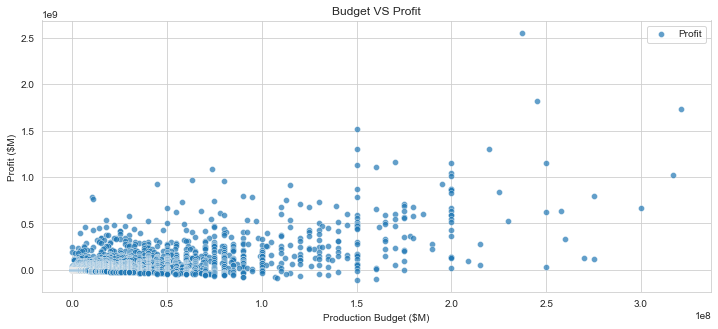

In [120]:
# Here you run your code to model the data
fig, ax = plt.subplots(figsize=(12,5))


sns.scatterplot(x = 'budget', y = 'profit', label = "Profit", alpha = 0.7, data = df)


plt.title("Budget VS Profit")
plt.ylabel("Profit ($M)")
plt.xlabel("Production Budget ($M)")
plt.legend()

### What is the most profitable genre?

In [121]:
#Calculate profitability of each genre
profit_and_genres_df = df_split[['title', 'profit', 'genre']]
mean_profit_vs_genre_df = profit_and_genres_df.groupby(['genre']).mean()
mean_profit_vs_genre_df = mean_profit_vs_genre_df.sort_values('profit', ascending=False).head(5)
mean_profit_vs_genre_df

,profit
genre,
Animation,2.233531e+08
Adventure,1.749874e+08
Sci-Fi,1.281056e+08
Action,9.376665e+07
Fantasy,9.153359e+07


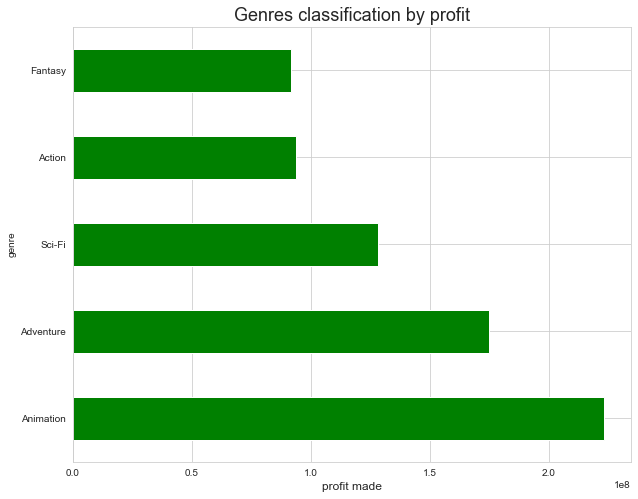

In [122]:
#plot
mean_profit_vs_genre_df['profit'].plot(stacked=False, kind='barh', figsize = (10,8),color='g');
plt.title('Genres classification by profit', size=18)
plt.xlabel('profit made', size=12);
sns.set_style("whitegrid")

### What genre is rated highest by users?

In [123]:
#Calculate user ratings of each genre
ratings_and_genres_df = df_split[['title', 'reviews_from_users', 'genre']]
mean_ratings_vs_genre_df = ratings_and_genres_df.groupby(['genre']).mean()
mean_ratings_vs_genre_df = mean_ratings_vs_genre_df.sort_values('reviews_from_users', ascending=False).head(10)
mean_ratings_vs_genre_df.head(10)

,reviews_from_users
genre,
Sci-Fi,559.592857
Adventure,478.432660
Fantasy,400.953069
Action,388.296893
Mystery,318.567568
Animation,295.156757
Horror,283.482436
Film-Noir,267.466667
Thriller,247.361734


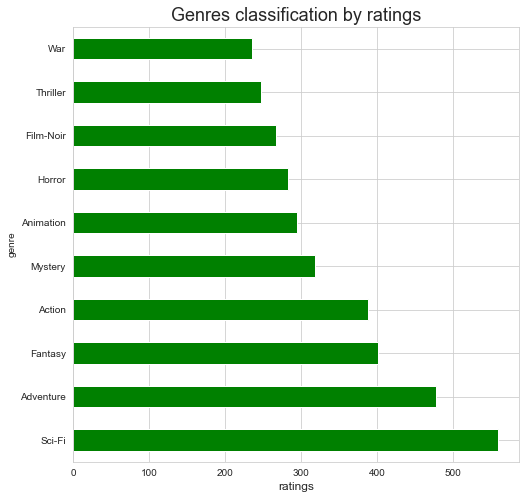

In [124]:
#plot
mean_ratings_vs_genre_df['reviews_from_users'].plot(stacked=False, kind='barh', figsize = (8,8),color='g');
plt.title('Genres classification by ratings', size=18)
plt.xlabel('ratings', size=12);
sns.set_style("whitegrid")

### What genre is rated highest by critics?

In [125]:
#Calculate critics ratings of each genre
ratings_and_genres_df = df_split[['title', 'reviews_from_critics', 'genre']]
mean_ratings_vs_genre_df = ratings_and_genres_df.groupby(['genre']).mean()
mean_ratings_vs_genre_df = mean_ratings_vs_genre_df.sort_values('reviews_from_critics', ascending=False).head(10)
mean_ratings_vs_genre_df.head(10)

,reviews_from_critics
genre,
Sci-Fi,188.789286
Adventure,179.710438
Animation,169.956757
Action,150.952819
Fantasy,140.574007
Mystery,133.693694
Horror,133.540984
Biography,124.436620
Thriller,116.490284


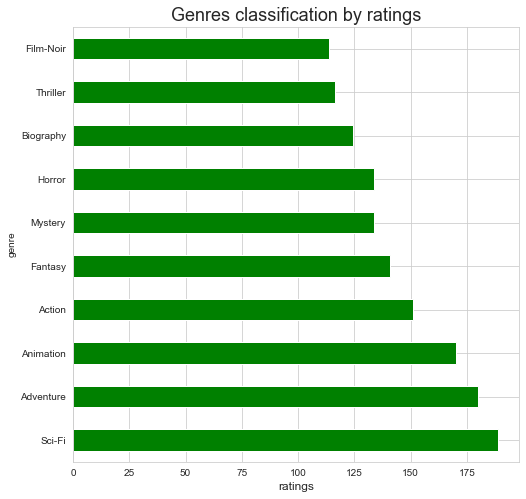

In [126]:
#plot
mean_ratings_vs_genre_df['reviews_from_critics'].plot(stacked=False, kind='barh', figsize = (8,8),color='g');
plt.title('Genres classification by ratings', size=18)
plt.xlabel('ratings', size=12);
sns.set_style("whitegrid")

### What months are the most profitable movies released?

In [138]:
# Calculate avg profit vs month of release
profit_by_month = df.groupby(["release_month"]).profit.mean().reset_index()
profit_by_month

,release_month,profit
0,1,4.318482e+07
1,2,4.159497e+07
2,3,3.999460e+07
3,4,4.055931e+07
4,5,4.523172e+07
5,6,4.268078e+07
6,7,2.679846e+07
7,8,4.139018e+07
8,9,5.971104e+07
9,10,5.233835e+07


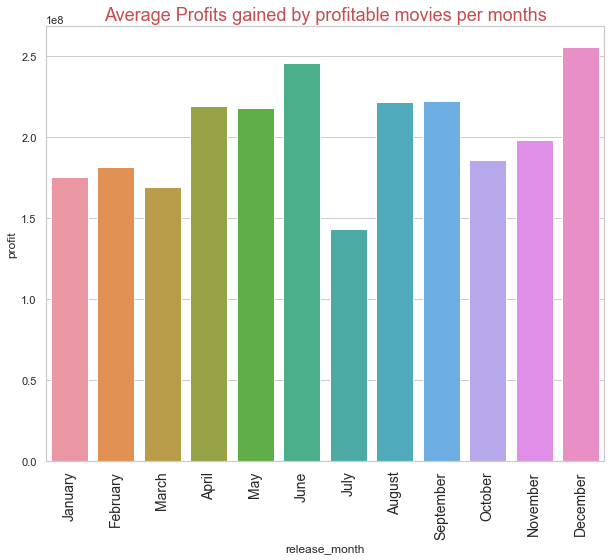

In [139]:
releasemonth_index = profit_df.set_index('release_month')
groupby_index = releasemonth_index.groupby('release_month')
# Calculate profit per month 
profit_permonth = groupby_index['profit'].mean()
profit_permonth = pd.DataFrame(profit_permonth)

#plot our data
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")

profit_permonth_bar = sns.barplot(x = profit_permonth.index, y = profit_permonth['profit'], data = profit_permonth)

profit_permonth_bar.axes.set_title('Average Profits gained by profitable movies per months', color="r", fontsize = 18)

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#rotate the x-axis text 
profit_permonth_bar.set_xticklabels(month_list, rotation = 90, size = 14);

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***